## Final Project - Classification

### Logan Mormando

### K-State Honor Code

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

#### Load Data

In [2]:
mv=pd.read_csv("data/movie_metadata.csv")
print(mv.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [3]:
#Removing columns with missing values to make our data more reliable
mv = mv.dropna()
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [4]:
dep = pd.get_dummies(mv["color"])
dep.head()

,Black and White,Color
0,0,1
1,0,1
2,0,1
3,0,1
5,0,1


In [5]:
dep2 = pd.get_dummies(mv["director_name"])
dep2.head()

,Aaron Schneider,Aaron Seltzer,Abel Ferrara,Adam Goldberg,Adam Marcus,Adam McKay,Adam Rapp,Adam Rifkin,Adam Shankman,Adrian Lyne,...,Yarrow Cheney,Yash Chopra,Yimou Zhang,Zach Braff,Zach Cregger,Zack Snyder,Zak Penn,Zal Batmanglij,Álex de la Iglesia,Émile Gaudreault
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dep3 = pd.get_dummies(mv["actor_1_name"])

In [7]:
dep4 = pd.get_dummies(mv['genres'])

In [8]:
dep5 = pd.get_dummies(mv['actor_2_name'])

In [9]:
dep6 = pd.get_dummies(mv['language'])

In [10]:
dep7 = pd.get_dummies(mv['country'])

In [11]:
dep8 = pd.get_dummies(mv['content_rating'])

In [12]:
dep9 = pd.get_dummies(mv['movie_title'])

In [13]:
dep10 = pd.get_dummies(mv['actor_3_name'])

In [14]:
dep11 = pd.get_dummies(mv['movie_imdb_link'])

In [15]:
dep12 = pd.get_dummies(mv['plot_keywords'])

In [16]:
mv = mv.drop(["color"], axis=1)

In [17]:
mv = mv.drop(["director_name"], axis=1)

In [18]:
mv = mv.drop(["actor_1_name"], axis=1)

In [19]:
mv = mv.drop(["genres"], axis=1)

In [20]:
mv = mv.drop(["actor_2_name"], axis=1)

In [21]:
mv = mv.drop(["language"], axis=1)

In [22]:
mv = mv.drop(["country"], axis=1)

In [23]:
mv = mv.drop(["content_rating"], axis=1)

In [24]:
mv = mv.drop(["movie_title"], axis=1)

In [25]:
mv = mv.drop(["actor_3_name"], axis=1)

In [26]:
mv = mv.drop(["movie_imdb_link"], axis=1)

In [27]:
mv = mv.drop(["plot_keywords"], axis=1)

In [28]:
mv['imdb_score'] = pd.cut(mv.imdb_score, bins=[0,3.9,5.9,7.9,10], include_lowest=False, right=True, labels =['bad', 'OK', 'good', 'excellent'])

In [29]:
mv.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.098109,0.370465


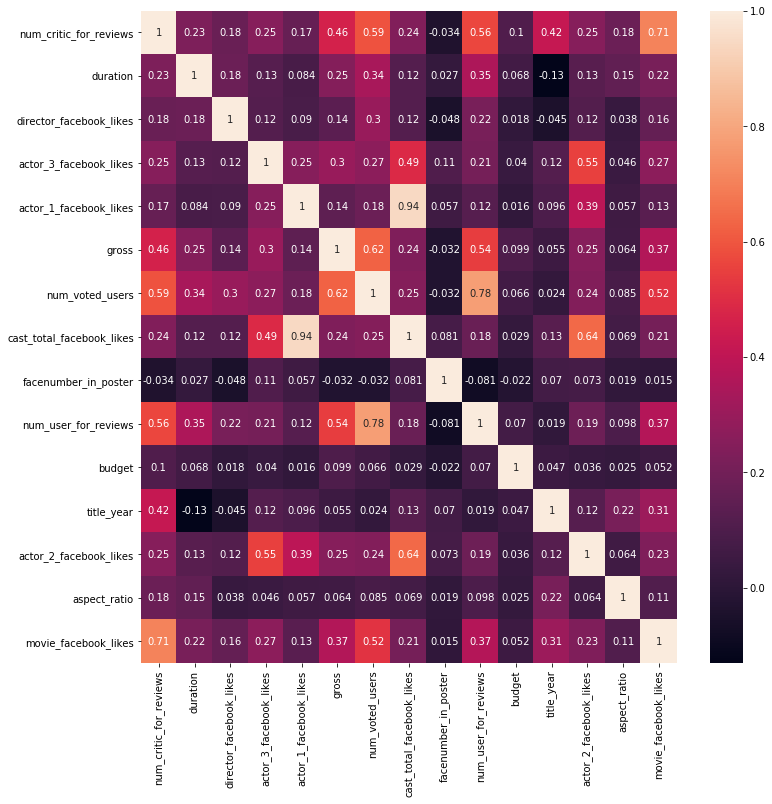

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(mv.corr(), annot=True)

In [31]:
mv = mv.join(dep)
mv.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Black and White,Color
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,good,1.78,33000,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,good,2.35,0,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,good,2.35,85000,0,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,excellent,2.35,164000,0,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,good,2.35,24000,0,1


In [32]:
mv = mv.join(dep2)

In [33]:
mv = mv.join(dep3, how='left', lsuffix='_left', rsuffix='_right')

In [34]:
mv = mv.join(dep4)

In [35]:
mv = mv.join(dep5, how='left', lsuffix='_left', rsuffix='_right')

In [36]:
mv = mv.join(dep6)

In [37]:
mv = mv.join(dep7)

In [38]:
mv = mv.join(dep8)

In [39]:
mv = mv.join(dep9)

In [40]:
mv = mv.join(dep10, how='left', lsuffix='_left', rsuffix='_right')

In [41]:
mv = mv.join(dep10, how='left', lsuffix='_left', rsuffix='_right')

In [42]:
mv = mv.join(dep11)

In [43]:
mv = mv.join(dep12)

In [44]:
# the percentage of scores
mv['imdb_score'].value_counts()/len(mv)*100

#66.53% of movies were good
#25.56% of movies were OK
#5.64% of movies were excellent
#2.26% of movies were bad

good         66.533546
OK           25.559105
excellent     5.644302
bad           2.263046
Name: imdb_score, dtype: float64

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [46]:
X = mv.drop(['imdb_score'], axis=1)
y = mv['imdb_score']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [49]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

0.726063829787234
--------------------------------------------------------
[[ 94   3   0  85]
 [ 12   1   0   6]
 [  0   0  20  22]
 [ 66   5   7 431]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.55      0.52      0.53       182
         bad       0.11      0.05      0.07        19
   excellent       0.74      0.48      0.58        42
        good       0.79      0.85      0.82       509

    accuracy                           0.73       752
   macro avg       0.55      0.47      0.50       752
weighted avg       0.71      0.73      0.72       752



In [50]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[7.60505847e+08 8.86204000e+05 2.37000000e+08]
 [3.09404152e+08 4.71220000e+05 3.00000000e+08]
 [2.00074175e+08 2.75868000e+05 2.45000000e+08]
 ...
 [4.24760000e+05 7.26390000e+04 7.00000000e+03]
 [2.04092000e+06 5.20550000e+04 7.00000000e+03]
 [8.52220000e+04 4.28500000e+03 1.10000000e+03]]


In [51]:
X.head(3)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,reference to ben affleck|reference to brad pitt|reference to george clooney|reference to jack nicholson|website,retirement|spoof|terrorist|transsexual|undercover,sandman|spider man|symbiote|venom|villain,sequel,sex in a car|sex video|sexual desire|sexuality|undressing,shower|stripper|tap dancing|underwear|undressing,sibling rivalry|singer|sister act|whistling|wisecrack humor,solar system|space|spaceship|starship|year 2047,title spoken by character,woman wearing only a man's shirt
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import pydotplus

In [53]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True

In [54]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


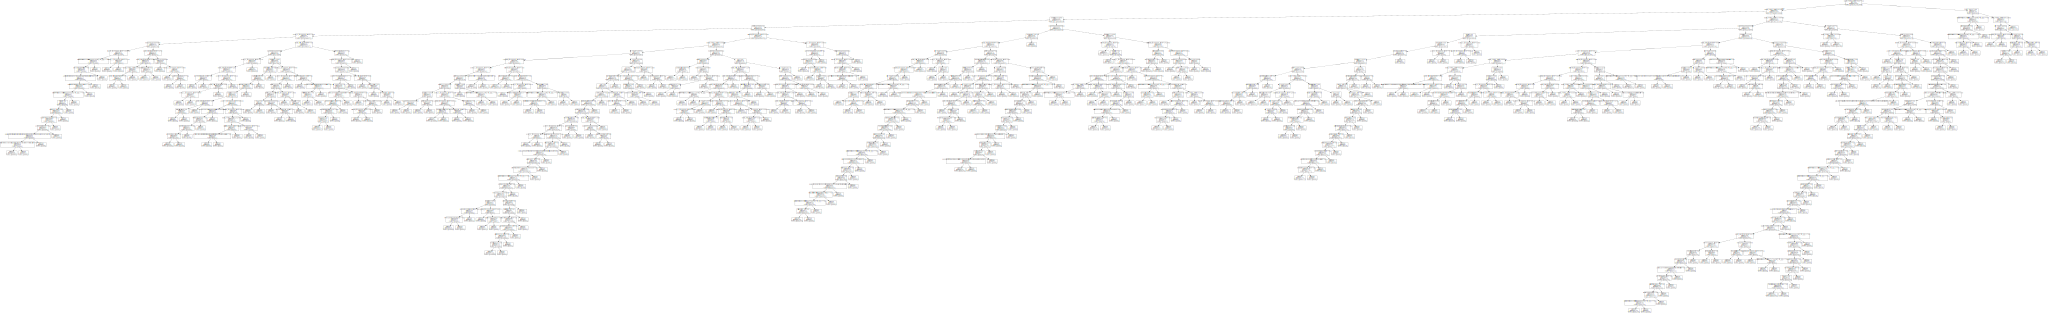

In [55]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

### More Simple Decision Tree

In [56]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt_simple = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5)

# Train a decision tree model
dt_simple = dt_simple.fit(X_train,y_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))

0.6805678793256433
--------------------------------------------------------
[[  0   0   0 273]
 [  0   0   0  30]
 [  0   0  27  35]
 [  0   0  22 740]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.00      0.00      0.00       273
         bad       0.00      0.00      0.00        30
   excellent       0.55      0.44      0.49        62
        good       0.69      0.97      0.80       762

    accuracy                           0.68      1127
   macro avg       0.31      0.35      0.32      1127
weighted avg       0.49      0.68      0.57      1127



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt_simple, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt_simple.pdf")

True

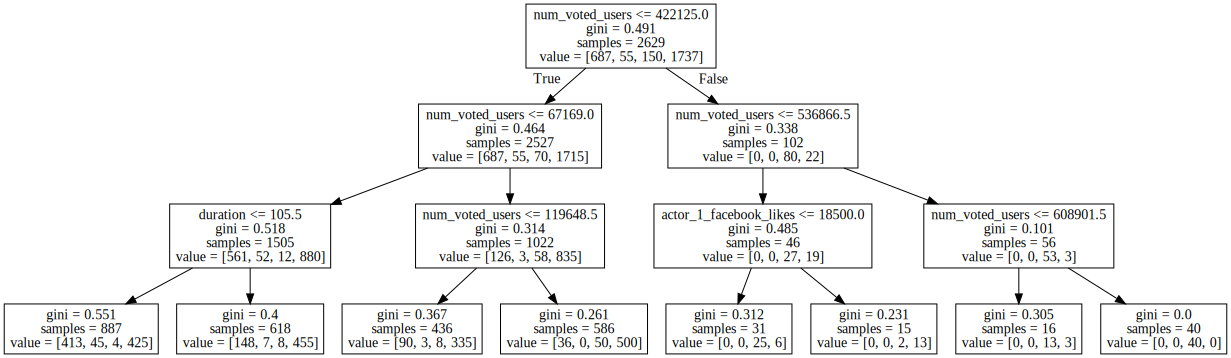

In [59]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X.columns))

### KNN

In [60]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X_train,y_train)


knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.6033717834960071
--------------------------------------------------------
[[ 74   0   4 195]
 [  6   0   0  24]
 [ 12   0   4  46]
 [135   2  23 602]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.33      0.27      0.30       273
         bad       0.00      0.00      0.00        30
   excellent       0.13      0.06      0.09        62
        good       0.69      0.79      0.74       762

    accuracy                           0.60      1127
   macro avg       0.29      0.28      0.28      1127
weighted avg       0.56      0.60      0.58      1127



In [62]:
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.51458886 0.47214854 0.55319149 0.53723404 0.5        0.424
 0.38933333 0.408      0.49066667 0.68449198]
0.4973654911055023


In [63]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5, iid=False)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6504382398120538
{'n_neighbors': 22}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')


## RFE

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

In [ ]:
X.head(1)

In [ ]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

In [ ]:
X_logistic = mv[['', '', '', '', '']]
print(X_logistic.head())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X_logistic)
result=logit_model.fit()
print(result.summary())

## Feature Importance

In [ ]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

In [ ]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

In [ ]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);